In [1]:
# for some basic operations
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import dabl

# importing math library to use ceil
from math import * 
import warnings

#
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split, learning_curve

In [2]:
data = pd.read_csv('StudentsPerformance.csv')
print("Size is:", data.shape)

Size is: (1000, 8)


In [3]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

In [6]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


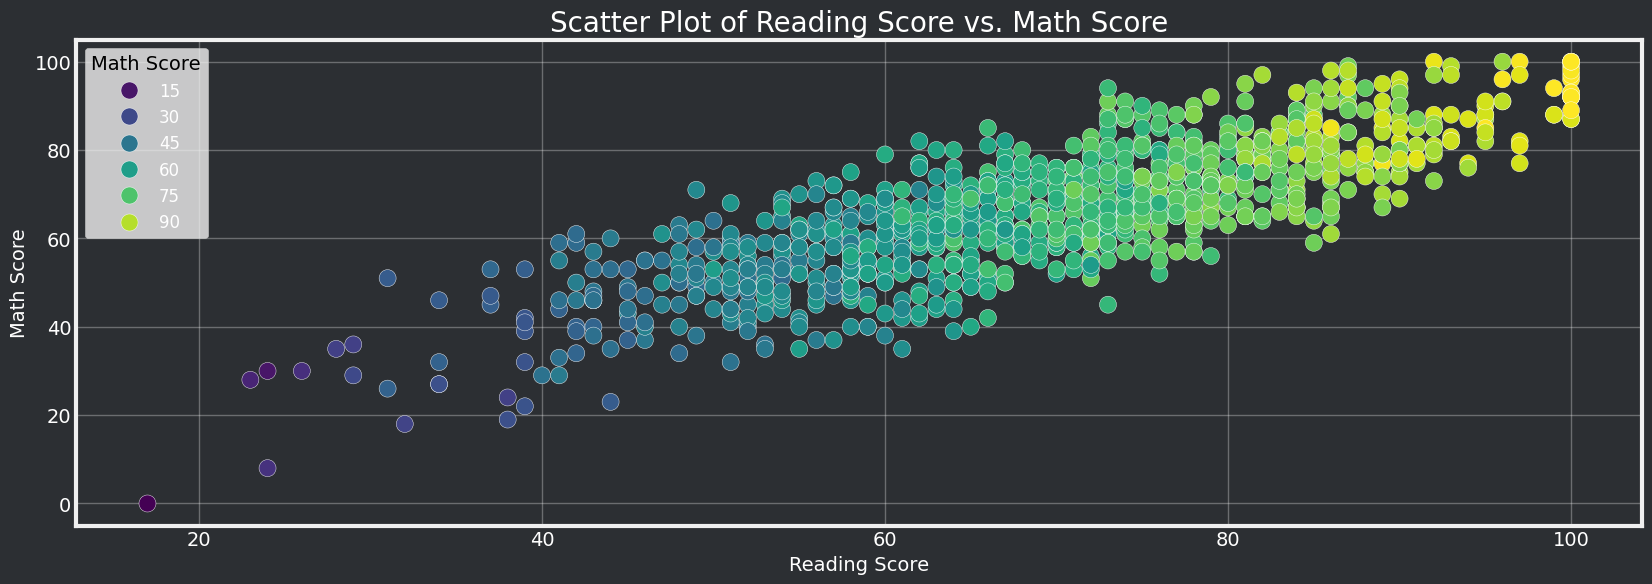

In [7]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(figsize=(18, 6), facecolor='#2c2f33')  # Dark grey background
scatter_plot = sns.scatterplot(data=data, x='reading score', y='math score', hue='writing score', palette='viridis', s=150, linewidth=0.3, ax=ax)

# Customize the plot background and grid
ax.set_facecolor('#2c2f33')  # background color
ax.grid(True, color='white', alpha=0.3)

# Add titles and labels
plt.title('Scatter Plot of Reading Score vs. Math Score', fontsize=20, color='white')
plt.xlabel('Reading Score', fontsize=14, color='white')
plt.ylabel('Math Score', fontsize=14, color='white')

# Customize the legend
legend = scatter_plot.legend(title='Math Score', fontsize=12, title_fontsize=14, loc='upper left')
for text in legend.get_texts():
    text.set_color('white')

# Customize the tick labels
ax.tick_params(colors='white', which='both')  # Tick labels color

# Show the plot
plt.show()

c:\Users\pizza\PycharmProjects\machine_learning_student_performance\da_venv\Lib\site-packages\dabl\preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])
c:\Users\pizza\PycharmProjects\machine_learning_student_performance\da_venv\Lib\site-packages\dabl\preprocessing.py:172: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(series[:10])


Target looks like regression


AttributeError: 'Legend' object has no attribute 'legendHandles'

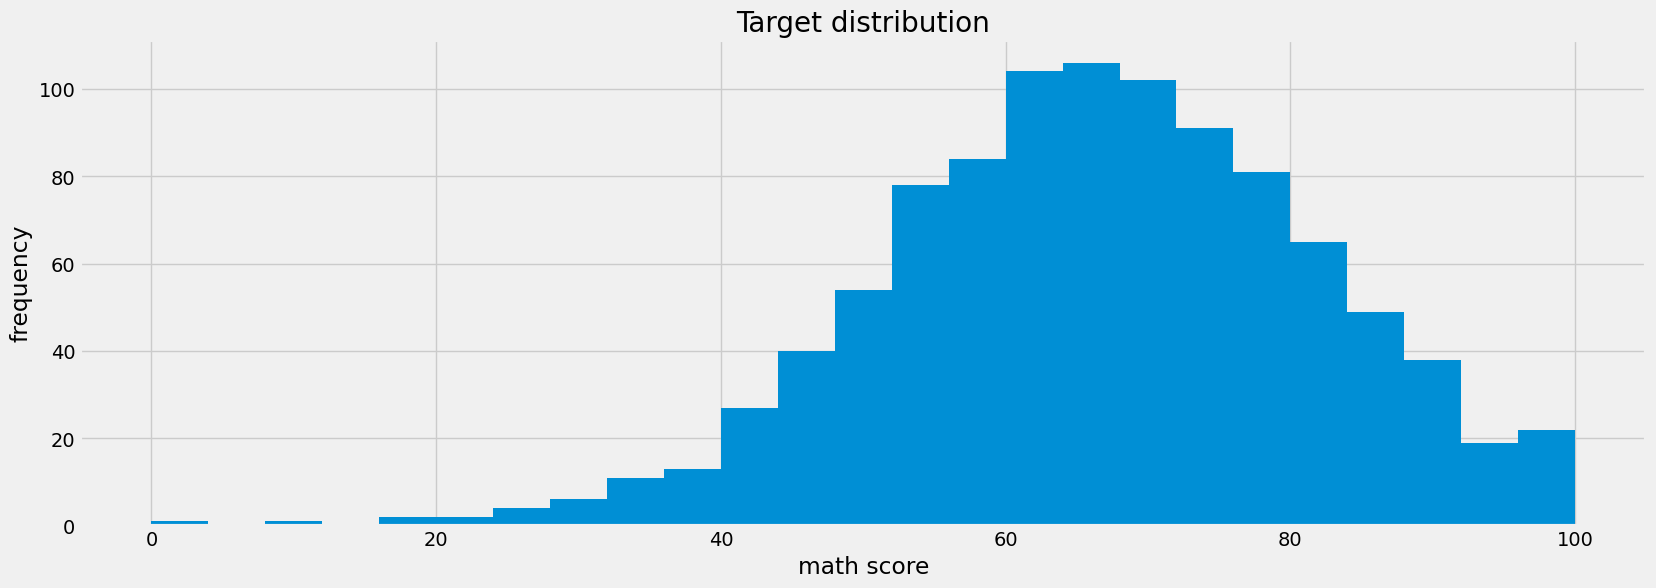

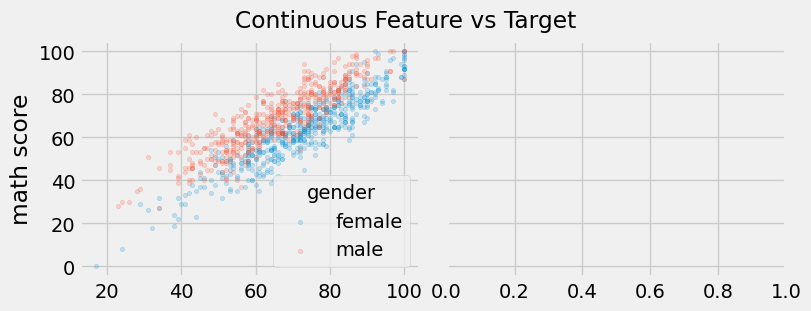

In [8]:
dabl.plot(data, target_col = 'math score')

In [10]:
data[['lunch','gender','math score','writing score',
      'reading score']].groupby(['lunch','gender']).median()

math score  writing score  reading score
lunch        gender                                          
free/reduced female        57.0           68.0           67.0
             male          62.0           59.0           61.0
standard     female        67.0           76.0           75.0
             male          72.0           67.0           67.5

In [9]:
data[['test preparation course',
      'gender',
      'math score',
      'writing score',
      'reading score']].groupby(['test preparation course','gender']).median()

math score  writing score  reading score
test preparation course gender                                          
completed               female        67.0           79.0           78.0
                        male          73.0           70.0           71.0
none                    female        62.0           70.0           71.0
                        male          67.0           60.0           63.0

C:\Users\pizza\AppData\Local\Temp\ipykernel_20316\1735854095.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['gender'], palette = 'bone')


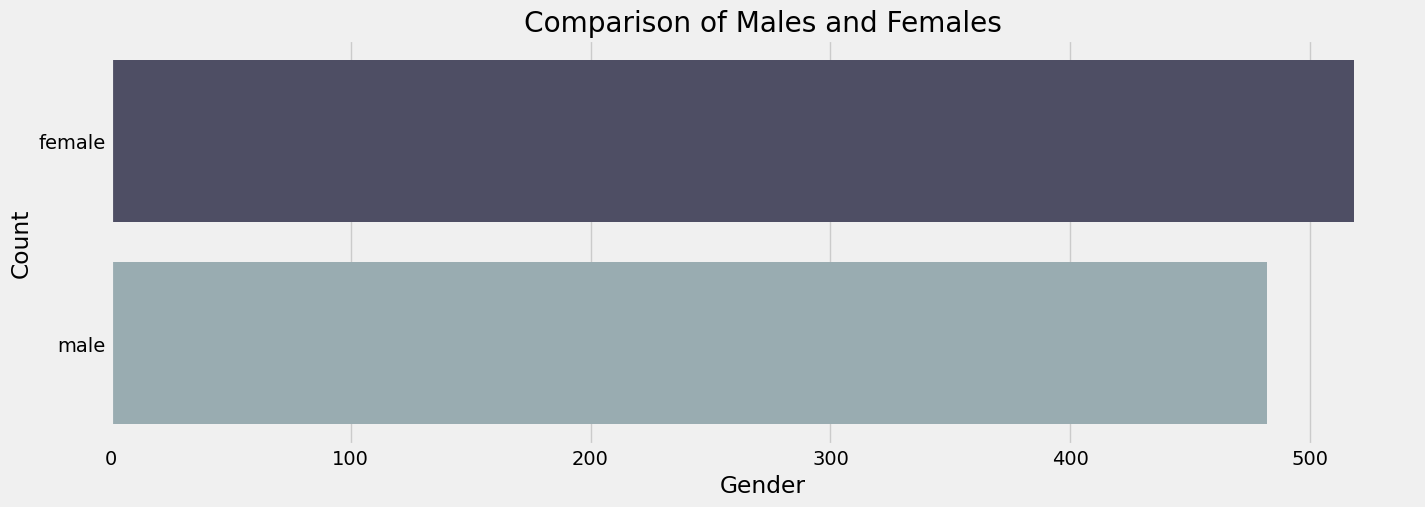

In [11]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(data['gender'], palette = 'bone')
plt.title('Comparison of Males and Females', fontweight = 30)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

C:\Users\pizza\AppData\Local\Temp\ipykernel_20316\1191819020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['race/ethnicity'], palette = 'pink')


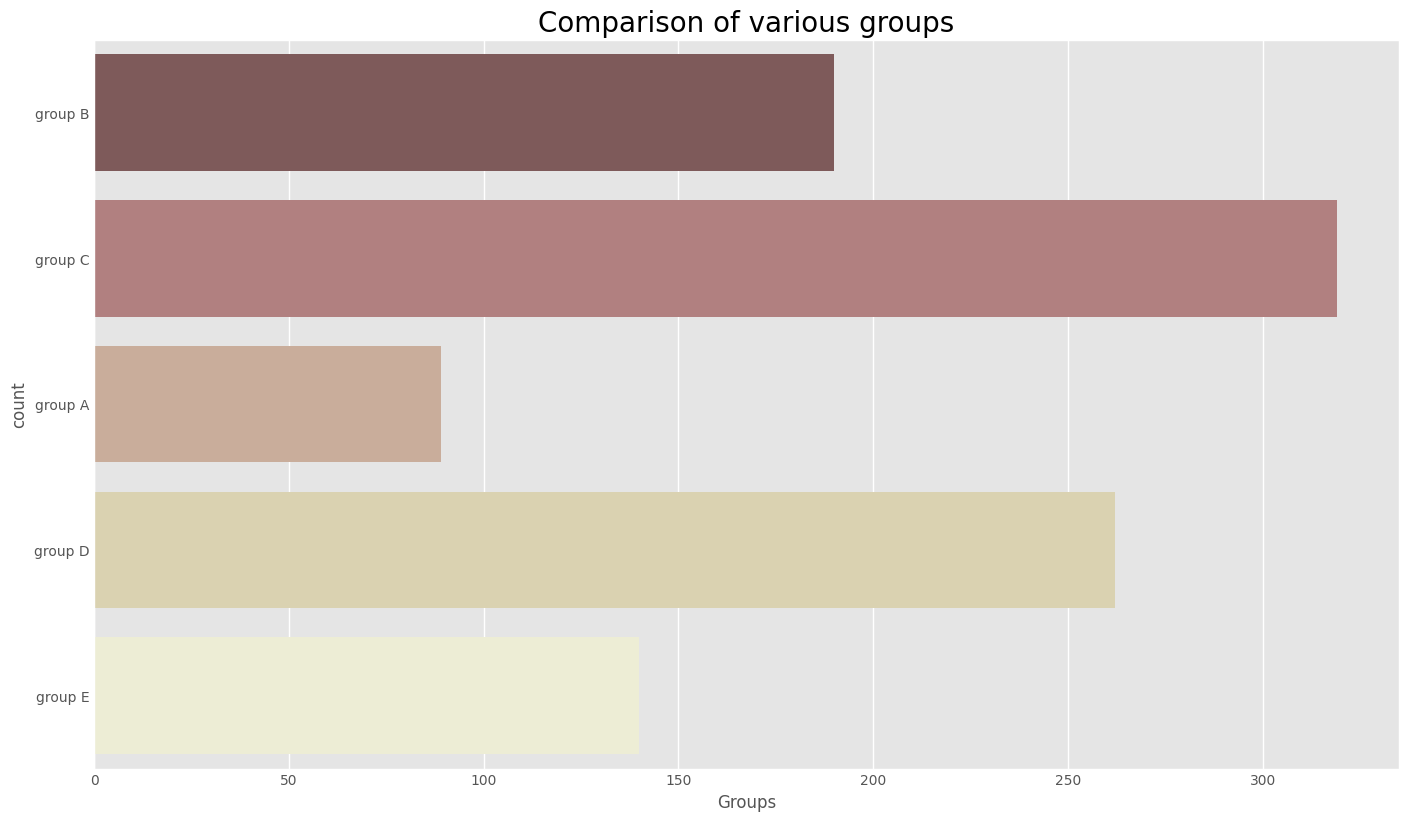

In [12]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')

sns.countplot(data['race/ethnicity'], palette = 'pink')
plt.title('Comparison of various groups', fontweight = 30, fontsize = 20)
plt.xlabel('Groups')
plt.ylabel('count')
plt.show()

C:\Users\pizza\AppData\Local\Temp\ipykernel_20316\3027009002.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['parental level of education'], palette = 'Blues')


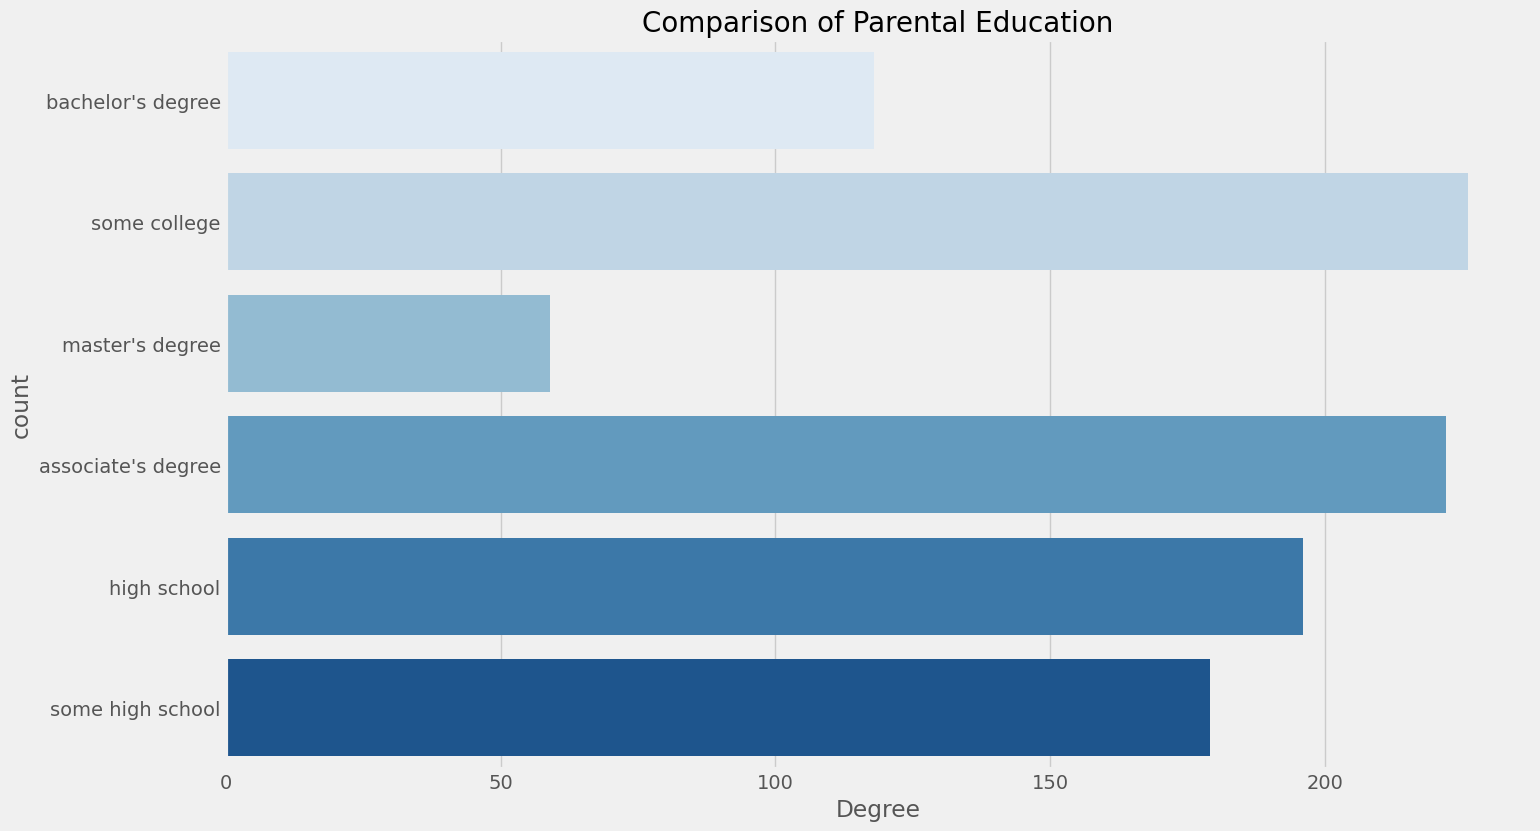

In [13]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('fivethirtyeight')

sns.countplot(data['parental level of education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize = 20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()

C:\Users\pizza\AppData\Local\Temp\ipykernel_20316\2015739061.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='math score', data=data, palette='Blues')


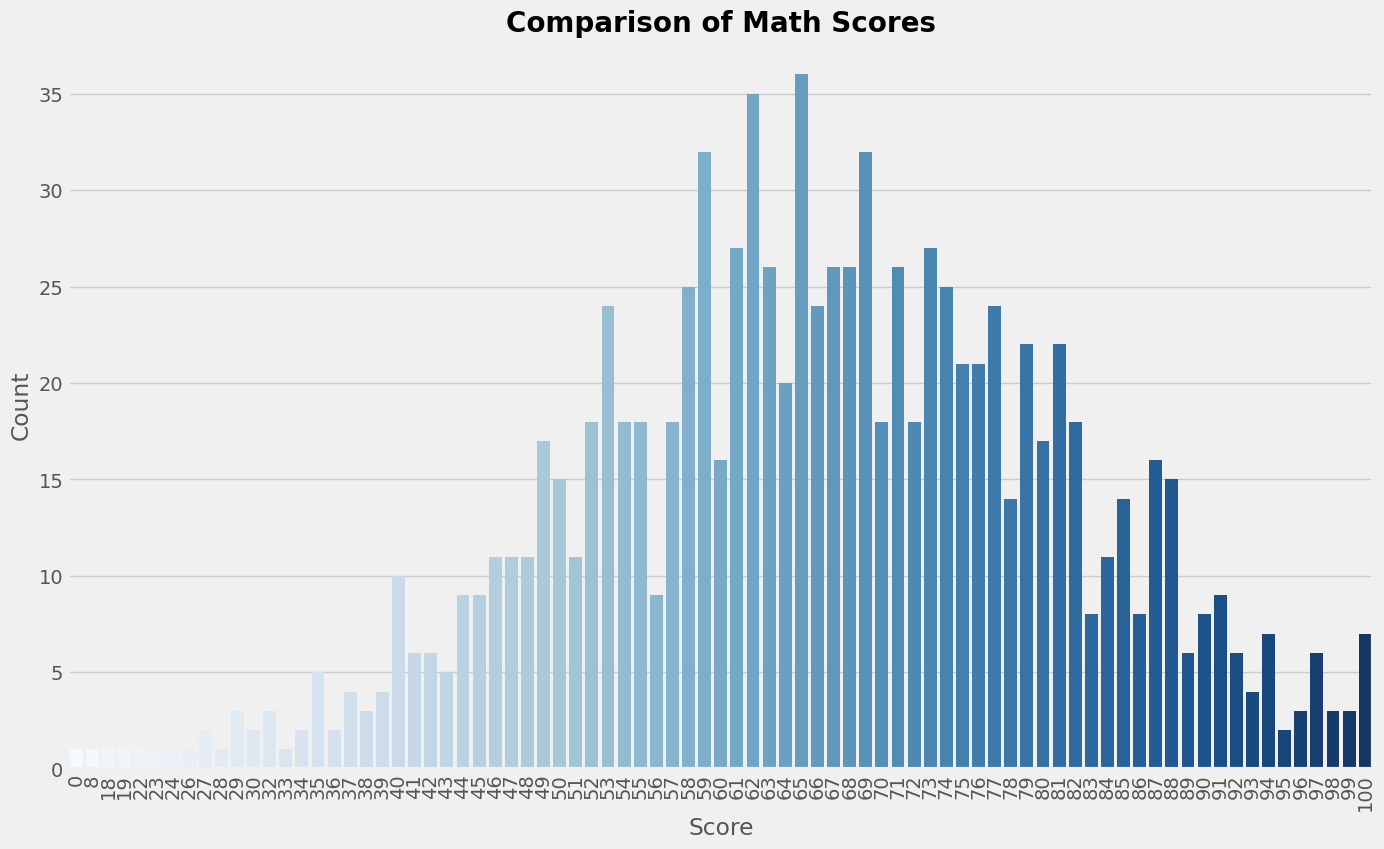

In [14]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('tableau-colorblind10')

# Plotting the count plot
sns.countplot(x='math score', data=data, palette='Blues')
plt.title('Comparison of Math Scores', fontweight='bold', fontsize=20)
plt.xlabel('Score')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

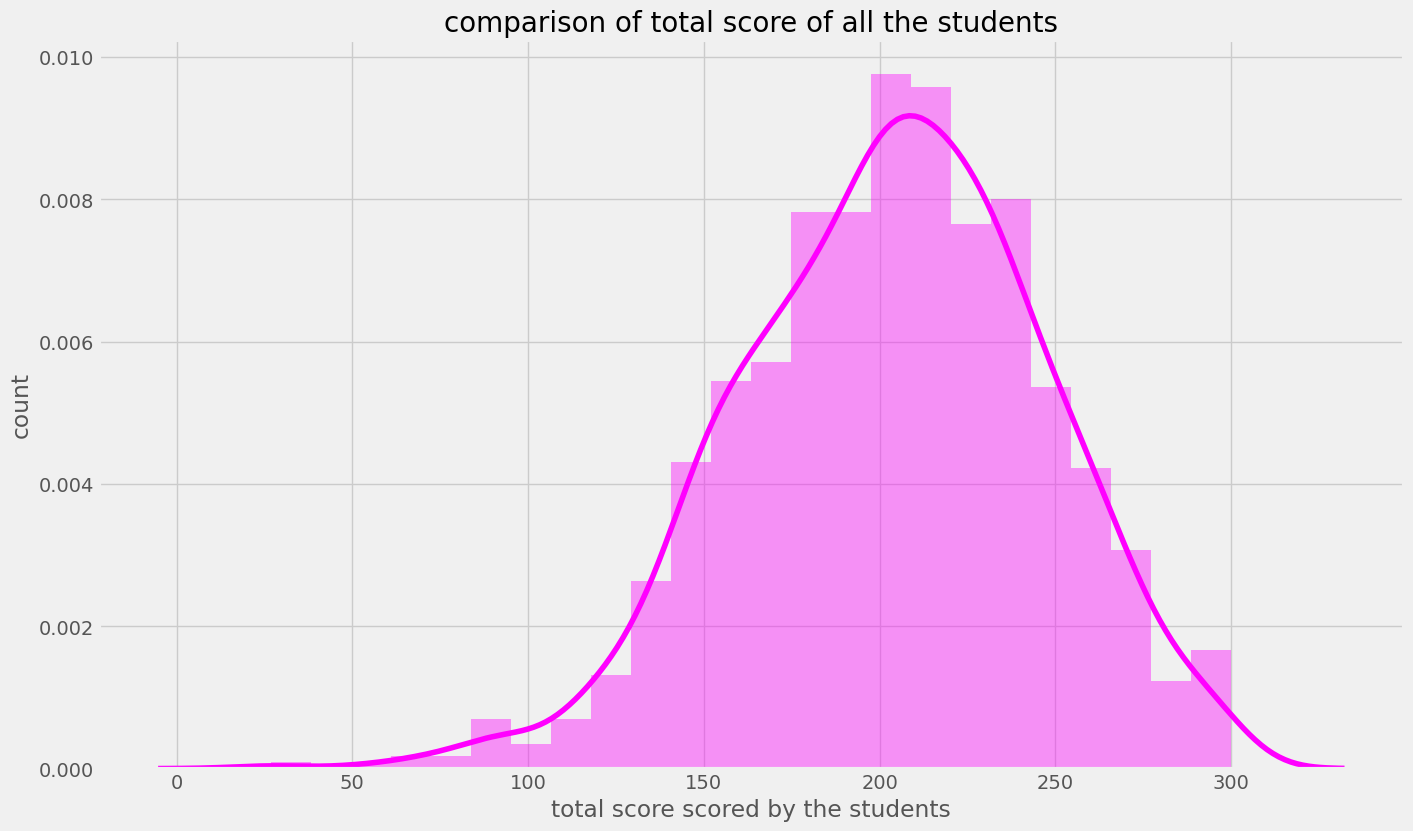

In [15]:
import warnings
warnings.filterwarnings('ignore')

data['total_score'] = data['math score'] + data['reading score'] + data['writing score']

sns.distplot(data['total_score'], color = 'magenta')

plt.title('comparison of total score of all the students', fontweight = 30, fontsize = 20)
plt.xlabel('total score scored by the students')
plt.ylabel('count')
plt.show()

In [16]:
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


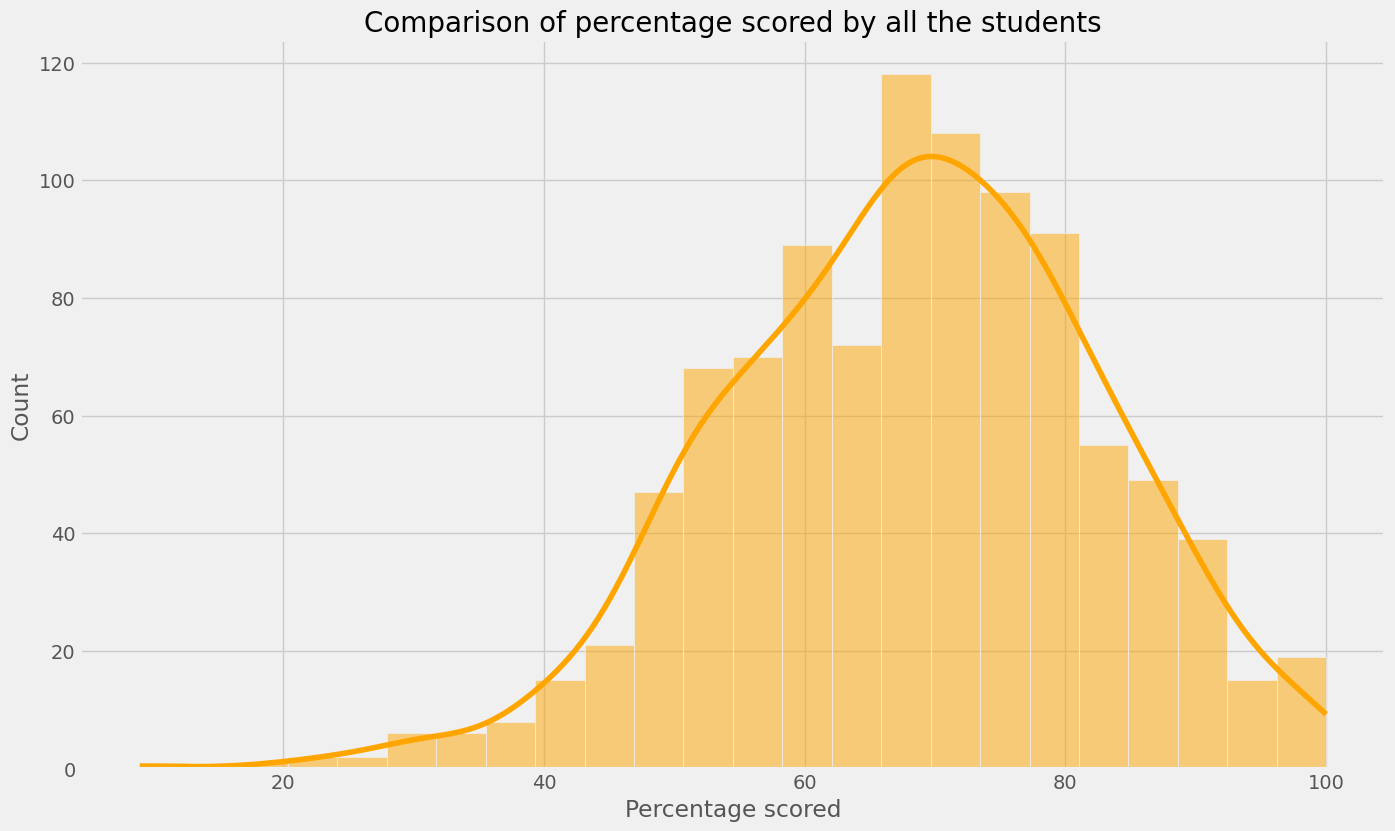

In [16]:

warnings.filterwarnings('ignore')

data['percentage'] = data['total_score']/3 # we divide by 3 since the total max possible score is 300 points 

data['percentage'] = data['percentage'].apply(ceil)

plt.rcParams['figure.figsize'] = (15, 9)
sns.histplot(data['percentage'], kde=True, color='orange')

plt.title('Comparison of percentage scored by all the students', fontweight = 30, fontsize = 20)
plt.xlabel('Percentage scored')
plt.ylabel('Count')
plt.show()

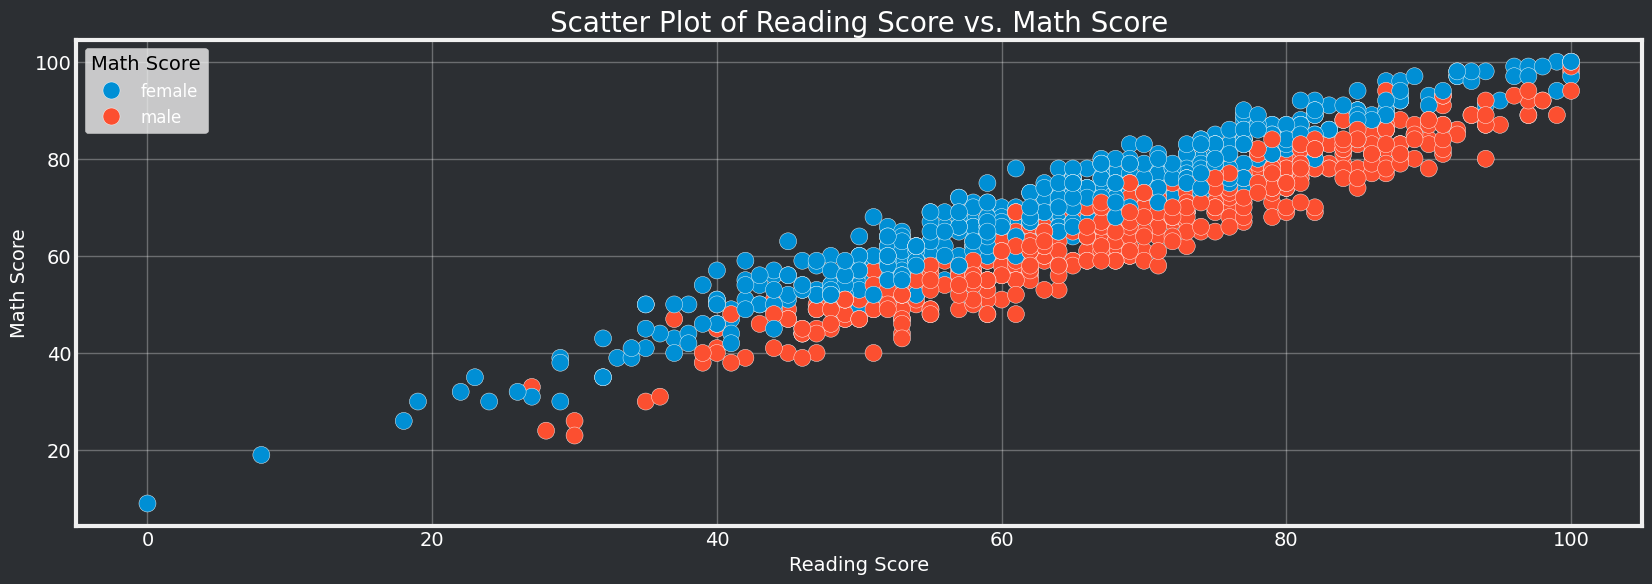

In [17]:
plt.rcParams['figure.figsize'] = (18, 6)
plt.style.use('fivethirtyeight')


fig, ax = plt.subplots(figsize=(18, 6), facecolor='#2c2f33')  # Dark grey background
#scatter_plot = sns.scatterplot(data=data, x='reading score', y='math score', hue='writing score', palette='viridis', s=150, linewidth=0.3, ax=ax)
scatter_plot = sns.scatterplot(data=data, x=data['math score'], y=data['percentage'], hue='gender', s=150, linewidth=0.3, ax= ax)

# Customize the plot background and grid
ax.set_facecolor('#2c2f33')  # background color
ax.grid(True, color='white', alpha=0.3)

# Add titles and labels
plt.title('Scatter Plot of Reading Score vs. Math Score', fontsize=20, color='white')
plt.xlabel('Reading Score', fontsize=14, color='white')
plt.ylabel('Math Score', fontsize=14, color='white')

# Customize the legend
legend = scatter_plot.legend(title='Math Score', fontsize=12, title_fontsize=14, loc='upper left')
for text in legend.get_texts():
    text.set_color('white')

# Customize the tick labels
ax.tick_params(colors='white', which='both')  # Tick labels color

# Show the plot
plt.show()

In [18]:
data.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73
1,female,group C,some college,standard,completed,69,90,88,247,83
2,female,group B,master's degree,standard,none,90,95,93,278,93
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,50
4,male,group C,some college,standard,none,76,78,75,229,77


In [20]:
def getgrade(percentage):

  if(percentage >= 90):
    return 'O'
  if(percentage >= 80):
    return 'A'
  if(percentage >= 70):
    return 'B'
  if(percentage >= 60):
    return 'C'
  if(percentage >= 40):
    return 'D'
  else :
    return 'E'

data['grades'] = data.apply(lambda x: getgrade(x['percentage']), axis = 1 )

data['grades'].value_counts()

grades
B    260
C    252
D    248
A    156
O     58
E     26
Name: count, dtype: int64

In [21]:
def getpasstest(subject_score):

    if subject_score >= 50:
        return 'Pass'
    else:
        return 'Fail'
    
data['pass_math'] = data.apply(lambda x: getpasstest(x['math score']), axis=1)
data['pass_reading'] = data.apply(lambda x: getpasstest(x['reading score']), axis=1)
data['pass_writing'] = data.apply(lambda x: getpasstest(x['writing score']), axis=1)

In [22]:
def getstatus(grade):
    if (grade == 'E' or grade=='D'):
        return 'Fail'
    else:
        return 'Pass'
    
data['status'] = np.where(data['grades'].isin(['E', 'D']), 'Fail', 'Pass') # more efficient than .apply method

In [23]:
data.head(5)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,percentage,grades,pass_math,pass_reading,pass_writing,status
0,female,group B,bachelor's degree,standard,none,72,72,74,218,73,B,Pass,Pass,Pass,Pass
1,female,group C,some college,standard,completed,69,90,88,247,83,A,Pass,Pass,Pass,Pass
2,female,group B,master's degree,standard,none,90,95,93,278,93,O,Pass,Pass,Pass,Pass
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,50,D,Fail,Pass,Fail,Fail
4,male,group C,some college,standard,none,76,78,75,229,77,B,Pass,Pass,Pass,Pass


# 1.1
## Experiment 1 Grades Prediction with RandomForestClassifier
#### Categorical Features Only  &  Categorical Features + Numerical Features

From the different fields in the dataset the first 5 fields are categorical values `gender`, `race`, `parental level of education`, `lunch` and `test preparation course`.
Lets find out the influence of these fields over the general prediction of the grades target column. To do so we train a model using ``RandomForestClassifier``, we use onehotencoding for the categorical features, which will create `N` columns of type binary for each cathegory. 

Categorical Features Only Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.15      0.17        27
           1       0.33      0.26      0.29        62
           2       0.12      0.11      0.12        45
           3       0.28      0.21      0.24        53
           4       0.05      0.12      0.07         8
           5       0.06      0.40      0.11         5

    accuracy                           0.20       200
   macro avg       0.17      0.21      0.17       200
weighted avg       0.24      0.20      0.21       200

Categorical Features Only OOB Score: 0.21125
Categorical + Numerical Features Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.85      0.90        27
           1       0.95      0.97      0.96        62
           2       0.90      0.96      0.92        45
           3       0.89      0.94      0.92        53
           4       1.00      0.50 

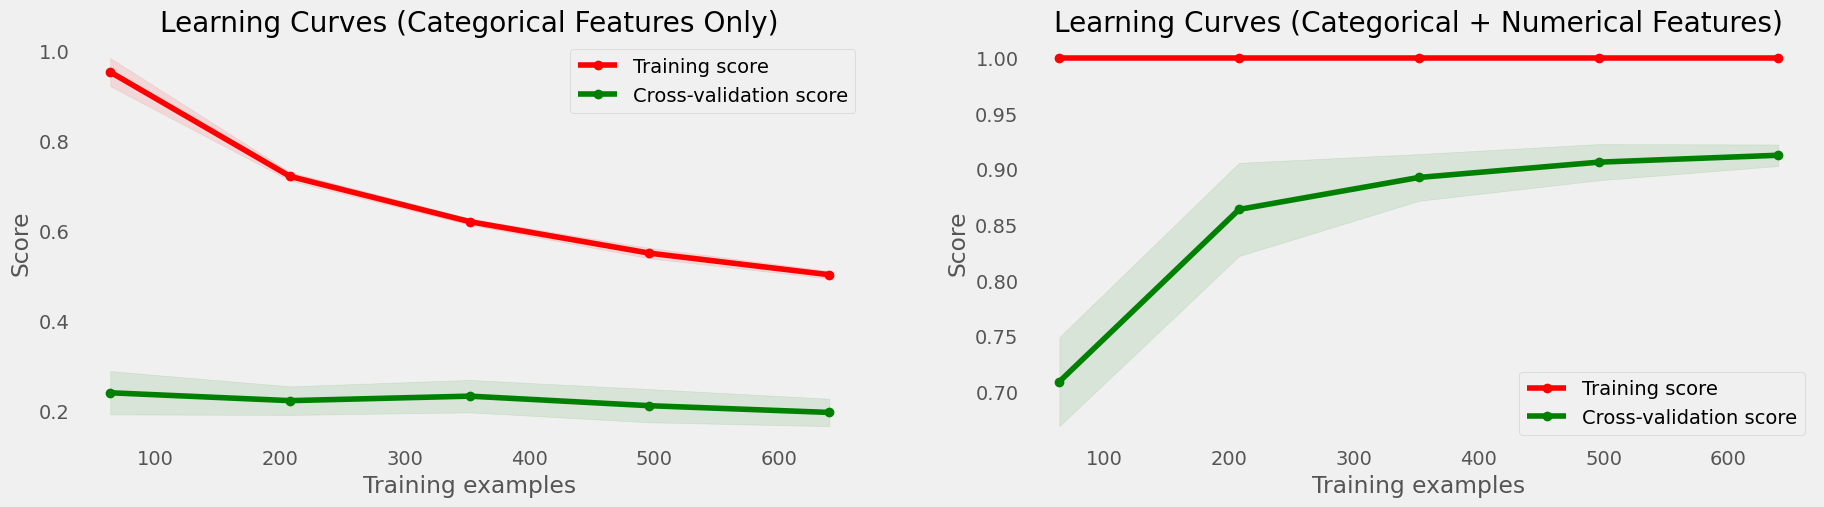

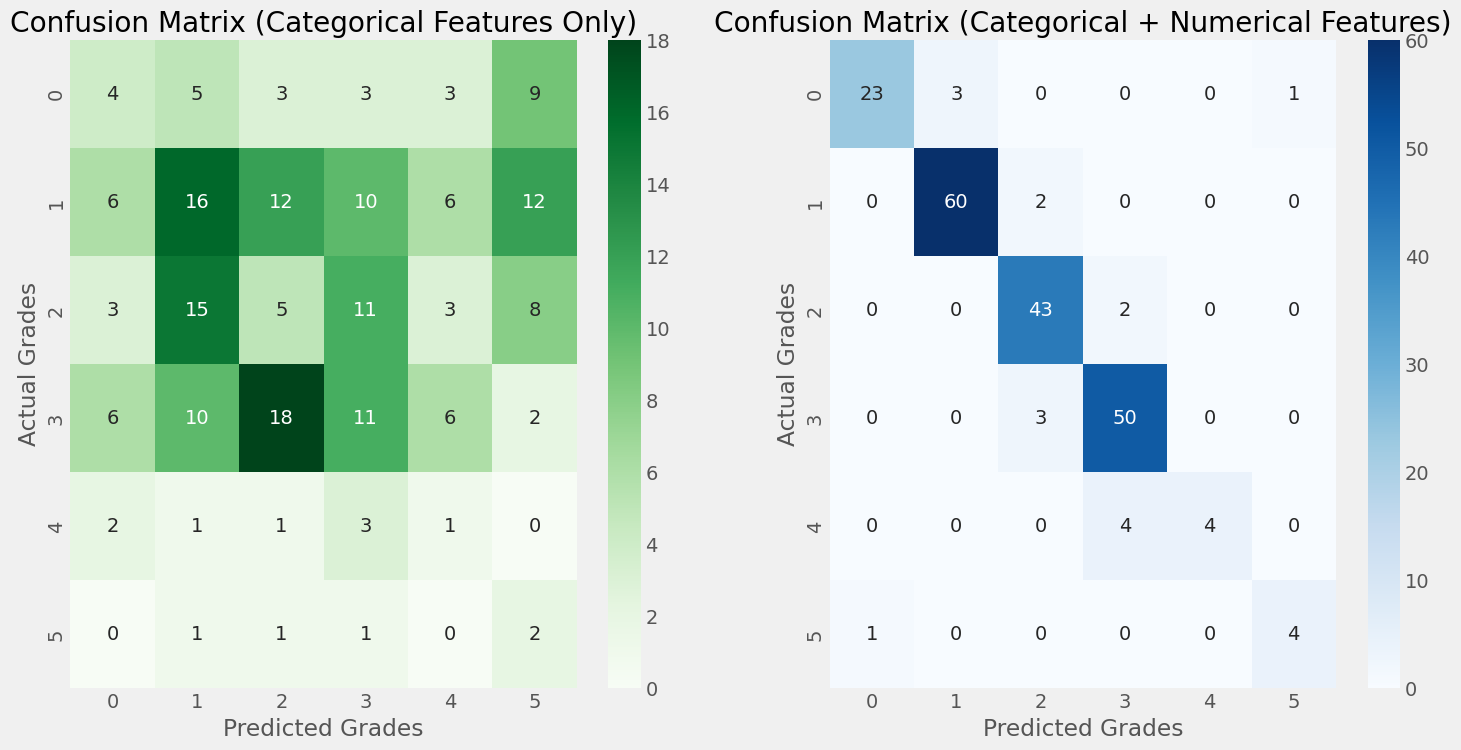

In [40]:
# Encode the target variable
le = LabelEncoder()
data['grades'] = le.fit_transform(data['grades'])
target = 'grades'
y = data[target]

# Convert class names to strings
class_names = [str(cls) for cls in le.classes_]

# Define the features
cat_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
all_features = cat_features + ['math score', 'reading score', 'writing score']

# Preprocessors
preprocessor_cat = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_features)
    ])

preprocessor_all = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_features),
        ('num', 'passthrough', ['math score', 'reading score', 'writing score'])
    ])

# Models with OOB score enabled
model_cat = Pipeline(steps=[
    ('preprocessor', preprocessor_cat),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced', oob_score=True))
])

model_all = Pipeline(steps=[
    ('preprocessor', preprocessor_all),
    ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced', oob_score=True))
])

# Train-test split
X_cat = data[cat_features]
X_all = data[all_features]
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=42)
X_train_all, X_test_all, _, _ = train_test_split(X_all, y, test_size=0.2, random_state=42)


# Learning curves function
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Train and evaluate both models
def train_and_evaluate(X_train, X_test, y_train, y_test, model, model_name, class_names):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Classification report
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # OOB Score
    oob_score = model.named_steps['classifier'].oob_score_
    print(f"{model_name} OOB Score: {oob_score}")
    
    return cm, oob_score

cm_cat, oob_score_cat = train_and_evaluate(X_train_cat, X_test_cat, y_train, y_test, model_cat, "Categorical Features Only", class_names)
cm_all, oob_score_all = train_and_evaluate(X_train_all, X_test_all, y_train, y_test, model_all, "Categorical + Numerical Features", class_names)

# Plot learning curves for both models
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

plot_learning_curve(model_cat, "Learning Curves (Categorical Features Only)", X_train_cat, y_train, axes=axes[0], cv=5, n_jobs=4)
plot_learning_curve(model_all, "Learning Curves (Categorical + Numerical Features)", X_train_all, y_train, axes=axes[1], cv=5, n_jobs=4)

plt.show()

# Plot confusion matrices
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.heatmap(cm_cat, annot=True, cmap='Greens', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Categorical Features Only)')
plt.xlabel('Predicted Grades')
plt.ylabel('Actual Grades')

plt.subplot(1, 2, 2)
sns.heatmap(cm_all, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Categorical + Numerical Features)')
plt.xlabel('Predicted Grades')
plt.ylabel('Actual Grades')

plt.show()


### Sample of OneHotEncoding 

We have 17 different columns in our df which accounts for the sum of all the different cathegories for every column before the onehotencoding is performed

In [39]:
from IPython.display import display
# Transform the categorical data using the preprocessor within the pipeline
X_train_cat_encoded = model_cat.named_steps['preprocessor'].transform(X_train_cat)

# Convert the encoded features to a df
encoded_feature_names = model_cat.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(cat_features)
X_train_cat_encoded_df = pd.DataFrame(X_train_cat_encoded.toarray(), columns=encoded_feature_names)

display(X_train_cat_encoded_df.head(5))

,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


### Conclusions from Experiment 1

1. **Categorical Features Only**:
  the model trained with categorical features only exhibited significant overfitting, with the training score decreasing notably as the number of training examples increased. The cross-validation score remained consistently low, indicating limited generalization capacity from categorical features alone. This model struggled to accurately predict most grades, with a high level of misclassification, particularly between adjacent grades. The precision, recall, and f1-scores were generally low across all grades, with an overall accuracy of 20%. The highest recall was for the grade "O" (outliers), but this was based on a very small sample size and had limited practical significance. The Out-of-Bag (OOB) score was 0.21125, reflecting poor generalization ability.
  
2. **Categorical + Numerical Features**:
   the model trained with both categorical and numerical features showed much better performance. The training score remained high and stable, indicating the model fit the training data well without significant overfitting. The cross-validation score increased with more training examples and was much higher compared to the model using only categorical features, demonstrating better generalization when numerical features were included. This model predicted grades with high accuracy, as evident from the high diagonal values in the confusion matrix and significantly fewer misclassifications. The precision, recall, and f1-scores were high across all grades, with an overall accuracy of 92%. The Out-of-Bag (OOB) score was significantly higher, consistent with the high cross-validation scores, underscoring the importance of including numerical features to enhance the model's performance and reliability.


# 1.2
## Experiment 1 Grades Prediction with RandomForestClassifier
#### Categorical Features Only  &  Categorical Features + Numerical Features

Categorical Features Only Classification Report:
               precision    recall  f1-score   support

           0       0.28      0.41      0.33        27
           1       0.40      0.13      0.20        62
           2       0.38      0.13      0.20        45
           3       0.44      0.32      0.37        53
           4       0.07      0.38      0.12         8
           5       0.07      0.60      0.12         5

    accuracy                           0.24       200
   macro avg       0.27      0.33      0.22       200
weighted avg       0.37      0.24      0.25       200

Categorical + Numerical Features Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.74      0.66        27
           1       0.82      0.65      0.72        62
           2       0.71      0.78      0.74        45
           3       0.90      0.81      0.85        53
           4       0.60      0.75      0.67         8
           5       0.50  

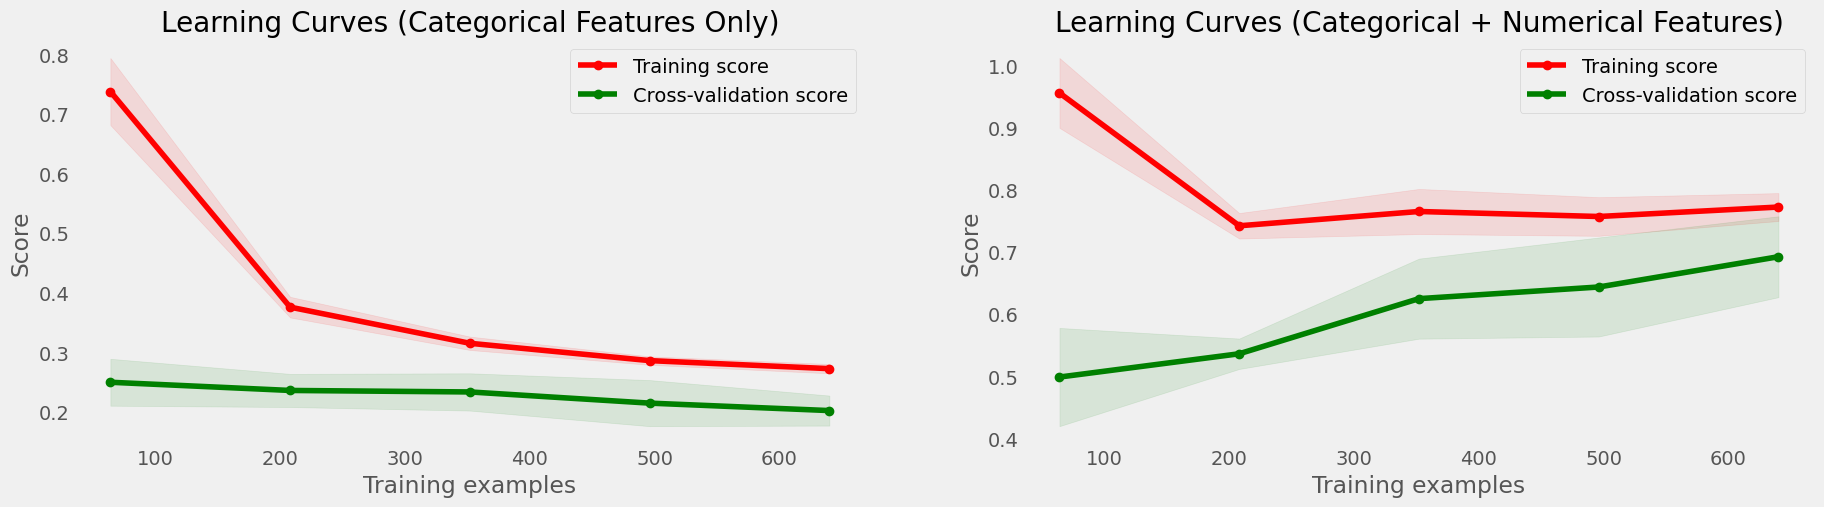

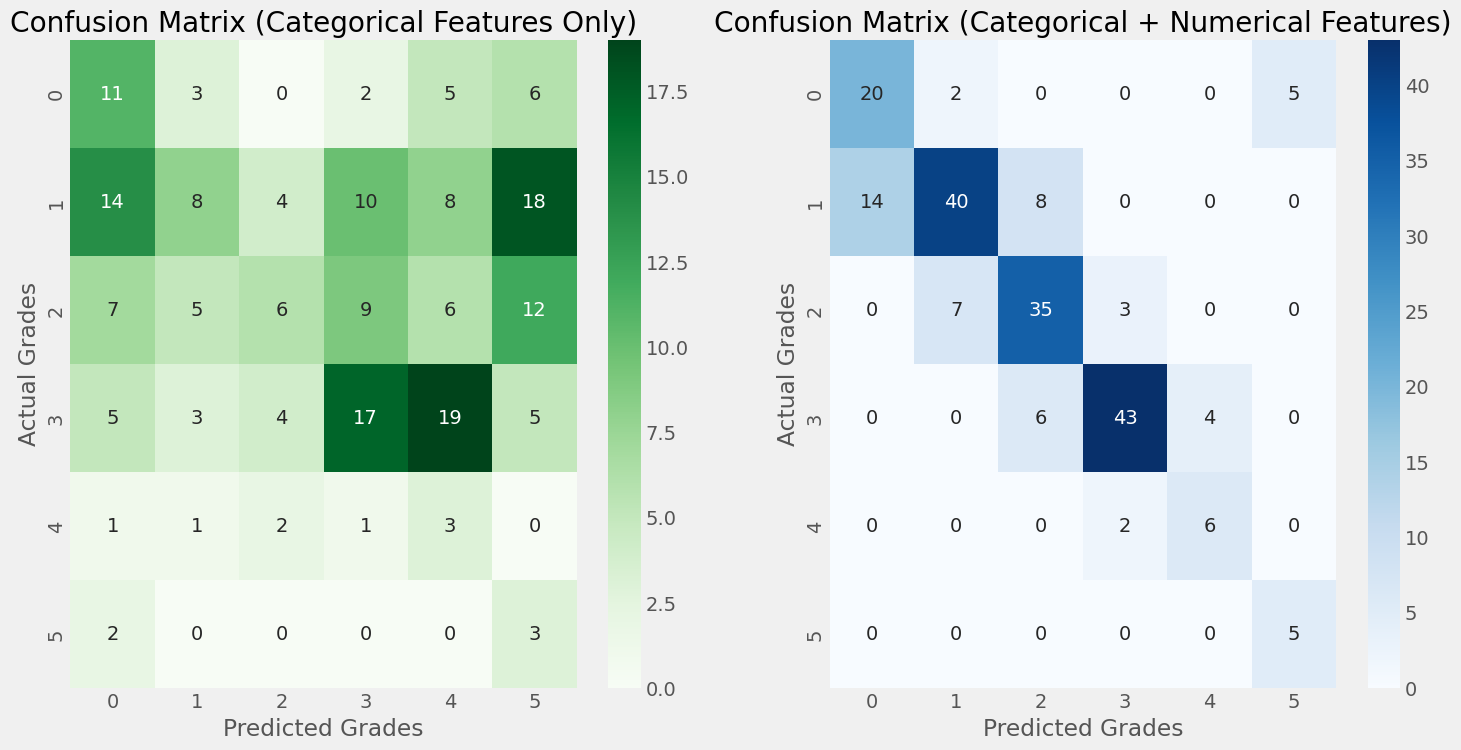

In [42]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Encode the target variable
le = LabelEncoder()
data['grades'] = le.fit_transform(data['grades'])
target = 'grades'
y = data[target]

# Convert class names to strings
class_names = [str(cls) for cls in le.classes_]

# Define the features
cat_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
all_features = cat_features + ['math score', 'reading score', 'writing score']

# Preprocessors
preprocessor_cat = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_features)
    ])

preprocessor_all = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), cat_features),
        ('num', 'passthrough', ['math score', 'reading score', 'writing score'])
    ])

# Models
model_cat = Pipeline(steps=[
    ('preprocessor', preprocessor_cat),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])

model_all = Pipeline(steps=[
    ('preprocessor', preprocessor_all),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'))
])

# Train-test split
X_cat = data[cat_features]
X_all = data[all_features]
X_train_cat, X_test_cat, y_train, y_test = train_test_split(X_cat, y, test_size=0.2, random_state=42)
X_train_all, X_test_all, _, _ = train_test_split(X_all, y, test_size=0.2, random_state=42)

# Learning curves function
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(20, 5))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='accuracy')

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1, color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1, color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    axes.legend(loc="best")

    return plt

# Train and evaluate both models
def train_and_evaluate(X_train, X_test, y_train, y_test, model, model_name, class_names):
    # Fit the model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Classification report
    print(f"{model_name} Classification Report:\n", classification_report(y_test, y_pred, target_names=class_names))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    return cm

cm_cat = train_and_evaluate(X_train_cat, X_test_cat, y_train, y_test, model_cat, "Categorical Features Only", class_names)
cm_all = train_and_evaluate(X_train_all, X_test_all, y_train, y_test, model_all, "Categorical + Numerical Features", class_names)

# Plot learning curves for both models
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

plot_learning_curve(model_cat, "Learning Curves (Categorical Features Only)", X_train_cat, y_train, axes=axes[0], cv=5, n_jobs=4)
plot_learning_curve(model_all, "Learning Curves (Categorical + Numerical Features)", X_train_all, y_train, axes=axes[1], cv=5, n_jobs=4)

plt.show()

# Plot confusion matrices
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.heatmap(cm_cat, annot=True, cmap='Greens', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Categorical Features Only)')
plt.xlabel('Predicted Grades')
plt.ylabel('Actual Grades')

plt.subplot(1, 2, 2)
sns.heatmap(cm_all, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Categorical + Numerical Features)')
plt.xlabel('Predicted Grades')
plt.ylabel('Actual Grades')

plt.show()

In Experiment 2 using ``LogisticRegression``, the model trained with categorical features only also demonstrated limited generalization, achieving an overall accuracy of 24%. This model had many misclassifications, particularly among lower-represented grades, with a macro average f1-score of 0.22. The model trained with both categorical and numerical features, however, achieved a substantially higher overall accuracy of 74%. The precision, recall, and f1-scores were considerably better across all grades compared to the model using only categorical features, with a macro average f1-score of 0.72. These results indicate that while LogisticRegression with categorical features only performs slightly better than RandomForest with categorical features, including numerical features significantly enhances the model's performance in both cases, which comes at no surprise since the numerical fields used for training in both cases have a direct linear regression with the grades target column.

# 2.1
## Experiment  Status Prediction
#### Categorical features

From the different fields in the dataset the first 5 fields are categorical values `gender`, `race`, `parental level of education`, `lunch` and `test preparation course`.
Lets find out the influence of these fields over the general prediction of the grades target column. 

Cross-validation scores: [0.675   0.7     0.70625 0.7375  0.675  ]
Average cross-validation score: 0.6987499999999999
              precision    recall  f1-score   support

        Fail       0.44      0.23      0.30        61
        Pass       0.72      0.87      0.79       139

    accuracy                           0.68       200
   macro avg       0.58      0.55      0.54       200
weighted avg       0.63      0.68      0.64       200



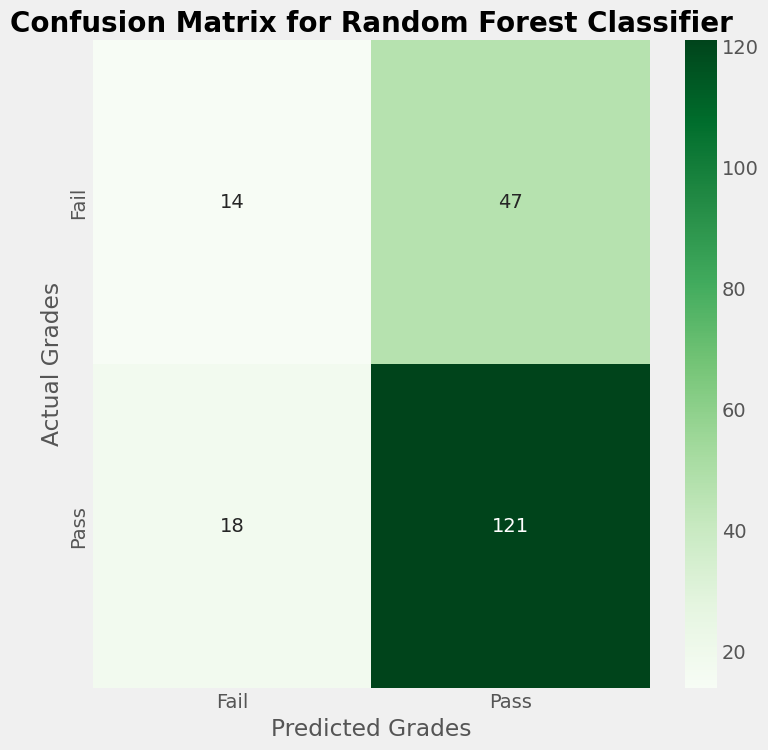

In [43]:
# Define features and target
features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
target = 'status'
X = data[features]
y = data[target]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), features)
    ])

# Create a pipeline with the preprocessor and a classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = preprocessor.fit_transform(X_train)

# Train the model using cross-validation
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Average cross-validation score: {cross_val_scores.mean()}")

# Fit the model on the entire training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix for Random Forest Classifier', fontweight='bold', fontsize=20)
plt.xlabel('Predicted Grades')
plt.ylabel('Actual Grades')
plt.show()

Cross-validation scores: [0.98125 0.99375 0.975   0.99375 0.9625 ]
Average cross-validation score: 0.98125
              precision    recall  f1-score   support

        Fail       0.95      0.95      0.95        61
        Pass       0.98      0.98      0.98       139

    accuracy                           0.97       200
   macro avg       0.96      0.96      0.96       200
weighted avg       0.97      0.97      0.97       200



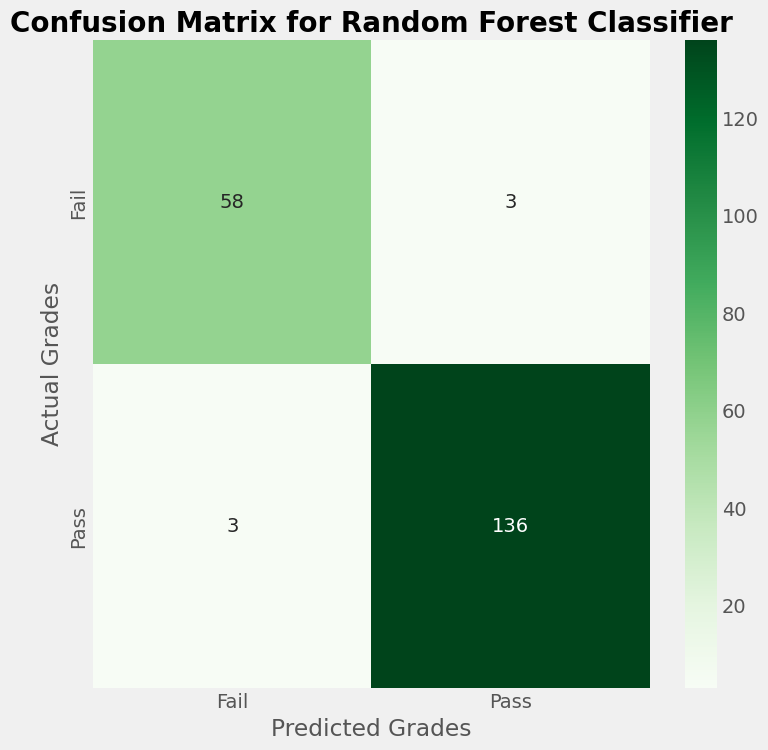

In [99]:
# Define features and target
features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']
target = 'status'
X = data[features]
y = data[target]

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']),
        ('num', 'passthrough', ['math score', 'reading score', 'writing score'])
    ])

# Create a pipeline with the preprocessor and a classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_transformed = preprocessor.fit_transform(X_train)

# Inspect the transformed data
#transformed_df = pd.DataFrame(X_train_transformed.toarray())
#print(transformed_df.tail())

# Train the model using cross-validation
cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)
print(f"Cross-validation scores: {cross_val_scores}")
print(f"Average cross-validation score: {cross_val_scores.mean()}")

# Fit the model on the entire training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot confusion matrix
plt.rcParams['figure.figsize'] = (8, 8)
sns.heatmap(cm, annot=True, cmap='Greens', fmt='d', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix for Random Forest Classifier', fontweight='bold', fontsize=20)
plt.xlabel('Predicted Grades')
plt.ylabel('Actual Grades')
plt.show()
